<a href="https://colab.research.google.com/github/Abdulaziz1607/Challenge_Data/blob/main/PROJET_DONNEES_MEDICALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abdulaziz Sadi-Cherif

---
# Projet Machine learning pour données médicale : Drug Review Dataset
---



Le but de ce challenge est de savoir si un médicament est efficace en se basant sur les commentaires des patients.
Il se divisera en deux axes, d'abord on prédira si les médicaments ont des aspects bénéfiques pour le patient ensuite les aspects négatifs.

On commence par importer les données et les bibliothèques adéquates.

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X_train = pd.read_csv("drugLibTrain_raw.tsv",sep="\t")
X_test = pd.read_csv("drugLibTest_raw.tsv",sep="\t")

In [ ]:
X_train.fillna("None",inplace=True)
X_test.fillna("None",inplace=True)

# Commençons par prédire l'efficacité des médicaments.

## Petite étude sur le jeu de données

In [ ]:
y_train_eff = X_train["effectiveness"]
X_train_eff = X_train.drop(["Unnamed: 0","sideEffects","rating","effectiveness","sideEffectsReview"],axis=1)

In [ ]:
y_test_eff = X_test["effectiveness"]
X_test_eff = X_test.drop(["Unnamed: 0","sideEffects","rating","effectiveness","sideEffectsReview"],axis=1)

In [ ]:
y_train_eff.unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
y_train_eff_label = l.fit_transform(y_train_eff)
y_train_eff_label = pd.DataFrame(y_train_eff_label)
y_train_eff_label.columns =['effect']


l = LabelEncoder()
y_test_eff_label = l.fit_transform(y_test_eff)
y_test_eff_label = pd.DataFrame(y_test_eff_label)
y_test_eff_label.columns =['effect']

In [ ]:
print("Dans le jeu d'apprentissage:")
print("il y a {} médicament très efficace".format(y_train_eff_label[y_train_eff_label["effect"]==1].shape[0]))
print("il y a {} médicament considérablement efficace".format(y_train_eff_label[y_train_eff_label["effect"]==0].shape[0]))
print("il y a {} médicament modérément efficace".format(y_train_eff_label[y_train_eff_label["effect"]==4].shape[0]))
print("il y a {} médicament marginalement efficace".format(y_train_eff_label[y_train_eff_label["effect"]==3].shape[0]))
print("il y a {} médicament pas efficace".format(y_train_eff_label[y_train_eff_label["effect"]==2].shape[0]))

Dans le jeu d'apprentissage:
il y a 1330 médicament très efficace
il y a 928 médicament considérablement efficace
il y a 415 médicament modérément efficace
il y a 187 médicament marginalement efficace
il y a 247 médicament pas efficace


In [ ]:
print("Dans le jeu de test:")
print("il y a {} médicament très efficace".format(y_test_eff_label[y_test_eff_label["effect"]==1].shape[0]))
print("il y a {} médicament considérablement efficace".format(y_test_eff_label[y_test_eff_label["effect"]==0].shape[0]))
print("il y a {} médicament modérément efficace".format(y_test_eff_label[y_test_eff_label["effect"]==4].shape[0]))
print("il y a {} médicament marginalement efficace".format(y_test_eff_label[y_test_eff_label["effect"]==3].shape[0]))
print("il y a {} médicament pas efficace".format(y_test_eff_label[y_test_eff_label["effect"]==2].shape[0]))

Dans le jeu de test:
il y a 411 médicament très efficace
il y a 310 médicament considérablement efficace
il y a 157 médicament modérément efficace
il y a 76 médicament marginalement efficace
il y a 82 médicament pas efficace


In [ ]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import string
sns.set()

Par souci de simplicité, nous allons considérer que les médicaments considérablement efficace et très efficace seront traiter ensemble, et les autres seront également regroupés ensemble. Nous nous ramenons donc un problème de classification binaire


In [ ]:
def multi_bi(data):
  n=data.shape[0]
  data_new = np.zeros(n)
  for i in range(n):
    if data["effect"][i] == 1 or data["effect"][i]==0:
        data_new[i]=1
    else :
        data_new[i]=0
  data_new = pd.DataFrame(data_new)
  data_new.columns=["effect"]
  return data_new

In [ ]:
y_train_eff_label = multi_bi(y_train_eff_label)
y_test_eff_label = multi_bi(y_test_eff_label)

Etant donné que le jeu est déséquilibré, nous allons condidérer la métrique roc_auc plutôt que l'accuracy qui donnerait des scores faussés

## BenefitsReview

In [ ]:
tokens = X_train_eff['benefitsReview'].apply(nltk.word_tokenize).values
stopwords = nltk.corpus.stopwords.words('english')

new_data = pd.DataFrame()

new_data['nb_mots'] = [len(w) for w in tokens]
new_data['nb_unique'] = [len(np.unique(w)) for w in tokens]
new_data['nb_phrases'] = X_train_eff['benefitsReview'].apply(lambda x: len(x.split('.')))
new_data['nb_stop'] = [sum(np.isin(tks,stopwords)) for tks in tokens]
new_data['moyenne_mots'] = [np.mean([len(x) for x in w]) for w in tokens]
new_data["nb_ponctuation"] = X_train_eff['benefitsReview'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
label_eff = pd.DataFrame(y_train_eff_label)
label_eff.columns = ["effect"]
data_eff = pd.concat([new_data,label_eff],axis=1)

In [ ]:
tokens = X_test_eff['benefitsReview'].apply(nltk.word_tokenize).values
stopwords = nltk.corpus.stopwords.words('english')

new_data_test_1 = pd.DataFrame()

new_data_test_1['nb_mots'] = [len(w) for w in tokens]
new_data_test_1['nb_unique'] = [len(np.unique(w)) for w in tokens]
new_data_test_1['nb_phrases'] = X_test_eff['benefitsReview'].apply(lambda x: len(x.split('.')))
new_data_test_1['nb_stop'] = [sum(np.isin(tks,stopwords)) for tks in tokens]
new_data_test_1['moyenne_mots'] = [np.mean([len(x) for x in w]) for w in tokens]
new_data_test_1["nb_ponctuation"] = X_test_eff['benefitsReview'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
label_eff = pd.DataFrame(y_train_eff_label)
label_eff.columns = ["effect"]
data_eff = pd.concat([new_data,label_eff],axis=1)

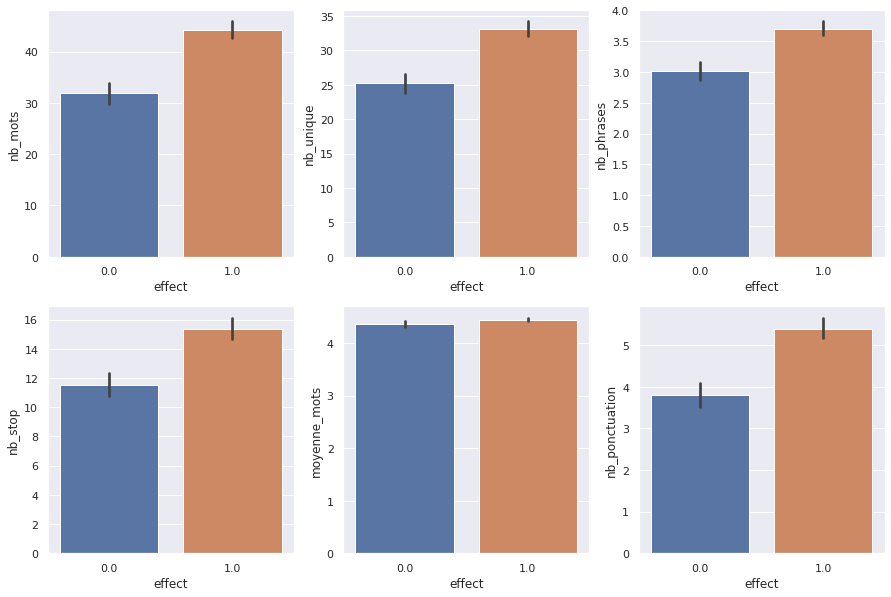

In [ ]:
fig,axe = plt.subplots(2,3,figsize=((15,10)))

sns.barplot(x="effect",y="nb_mots",data=data_eff,ax=axe[0,0]);
sns.barplot(x="effect",y="nb_unique",data=data_eff,ax=axe[0,1]);
sns.barplot(x="effect",y="nb_phrases",data=data_eff,ax=axe[0,2]);
sns.barplot(x="effect",y="nb_stop",data=data_eff,ax=axe[1,0]);
sns.barplot(x="effect",y="moyenne_mots",data=data_eff,ax=axe[1,1]);
sns.barplot(x="effect",y="nb_ponctuation",data=data_eff,ax=axe[1,2]);

## CommentsReview

In [ ]:
tokens = X_train_eff["commentsReview"].apply(lambda x : nltk.word_tokenize(str(x))).values
stopwords = nltk.corpus.stopwords.words('english')

new_data_1 = pd.DataFrame()

new_data_1['nb_mots'] = [len(w) for w in tokens]
new_data_1['nb_unique'] = [len(np.unique(w)) for w in tokens]
new_data_1['nb_phrases'] = X_train_eff['commentsReview'].apply(lambda x: len(str(x).split('.')))
new_data_1['nb_stop'] = [sum(np.isin(tks,stopwords)) for tks in tokens]
new_data_1['moyenne_mots'] = [np.mean([len(x) for x in w]) for w in tokens]
new_data_1["nb_ponctuation"] = X_train_eff['commentsReview'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
label_eff = pd.DataFrame(y_train_eff_label)
label_eff.columns = ["effect"]
data_eff_1 = pd.concat([new_data_1,label_eff],axis=1)

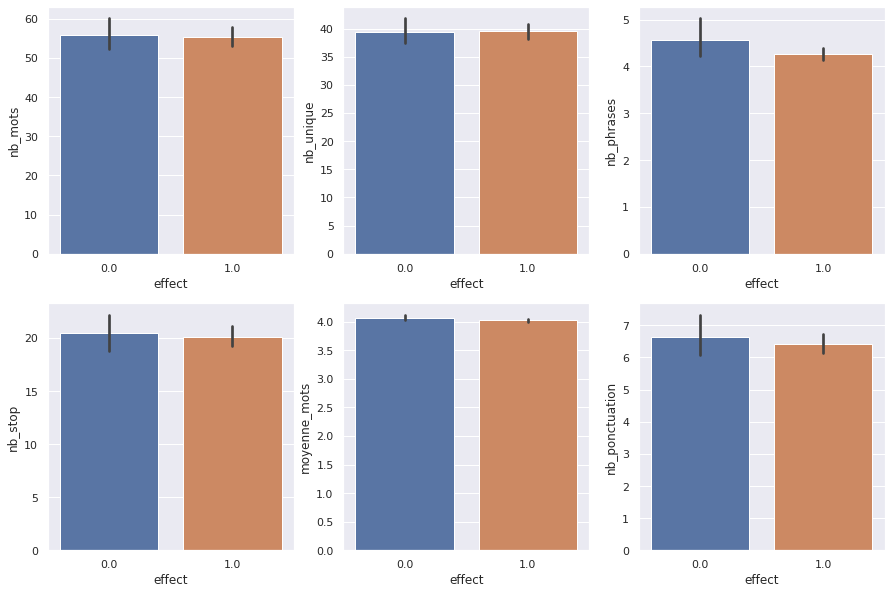

In [ ]:
fig,axe = plt.subplots(2,3,figsize=((15,10)))

sns.barplot(x="effect",y="nb_mots",data=data_eff_1,ax=axe[0,0]);
sns.barplot(x="effect",y="nb_unique",data=data_eff_1,ax=axe[0,1]);
sns.barplot(x="effect",y="nb_phrases",data=data_eff_1,ax=axe[0,2]);
sns.barplot(x="effect",y="nb_stop",data=data_eff_1,ax=axe[1,0]);
sns.barplot(x="effect",y="moyenne_mots",data=data_eff_1,ax=axe[1,1]);
sns.barplot(x="effect",y="nb_ponctuation",data=data_eff_1,ax=axe[1,2]);

## LabelEncoder

In [ ]:
X_train_eff = pd.concat([X_train_eff,new_data,pd.DataFrame(y_train_eff_label)],axis=1)
X_test_eff = pd.concat([X_test_eff,new_data_test_1,pd.DataFrame(y_test_eff_label)],axis=1)

In [ ]:
X_train_eff.sort_values("urlDrugName")[:5]

,urlDrugName,condition,benefitsReview,commentsReview,nb_mots,nb_unique,nb_phrases,nb_stop,moyenne_mots,nb_ponctuation,effect
2270,abilify,bipolar,I had severe depression with agitation and mix...,the abilify decreased the need for daily klono...,31,25,4,9,3.967742,5,1.0
1754,abilify,depression/anxiety,Within 1 week of taking the cocktail of Abilif...,I take one pill of each 1st thing in the am......,41,37,9,15,4.609756,10,1.0
237,abilify,depression,I've only been on it for a week but I've notic...,My doctor added Abilify to my 60 mg of Cymbalt...,44,31,4,22,3.227273,6,1.0
189,abilify,depression not resolved with antidepressant drugs,While on abilify I can honestly say the depres...,I am only taking ativan & getting psychologica...,11,11,1,3,4.636364,1,1.0
1068,abilify,bipolar disorder,I didn't notice any benefit at all. Supposedly...,I was prescribed Abilify (15mg/daily) to assis...,36,31,4,14,3.861111,6,0.0


In [ ]:
drug_cond = X_train_eff['urlDrugName'].astype('object')+str(' ')+X_train_eff['condition'].astype('object')
drug_cond = pd.DataFrame(drug_cond)
drug_cond.columns = ["couple"]

drug_cond_t = X_test_eff['urlDrugName'].astype('object')+str(' ')+X_test_eff['condition'].astype('object')
drug_cond_t = pd.DataFrame(drug_cond_t)
drug_cond_t.columns = ["couple"]
Encoder = LabelEncoder()
urlDrugName_label = pd.DataFrame(Encoder.fit_transform(X_train_eff["urlDrugName"]))
urlDrugName_label.columns = ["urlDrugName_label"]

Encoder = LabelEncoder()
urlDrugName_label_t = pd.DataFrame(Encoder.fit_transform(X_test_eff["urlDrugName"]))
urlDrugName_label_t.columns = ["urlDrugName_label"]
condition =X_train_eff['condition'].apply(lambda x: str(x).replace(" ",""))
drug_cond =drug_cond['couple'].apply(lambda x: str(x).replace(" ",""))
condition_label = pd.DataFrame(Encoder.fit_transform(condition))
condition_label.columns = ["condition_label"]
couple_label = pd.DataFrame(Encoder.fit_transform(drug_cond))
couple_label.columns = ["couple_label"]

condition_t =X_test_eff['condition'].apply(lambda x: str(x).replace(" ",""))
drug_cond_t =drug_cond_t['couple'].apply(lambda x: str(x).replace(" ",""))
condition_label_t = pd.DataFrame(Encoder.fit_transform(condition_t))
condition_label_t.columns = ["condition_label"]
couple_label_t = pd.DataFrame(Encoder.fit_transform(drug_cond_t))
couple_label_t.columns = ["couple_label"]
X_train_eff  = pd.concat([X_train_eff,urlDrugName_label,couple_label,condition_label],axis=1)
X_test_eff  = pd.concat([X_test_eff,urlDrugName_label_t,couple_label_t,condition_label_t],axis=1)
X_train_eff.sort_values("urlDrugName").head(5)

,urlDrugName,condition,benefitsReview,commentsReview,nb_mots,nb_unique,nb_phrases,nb_stop,moyenne_mots,nb_ponctuation,effect,urlDrugName_label,couple_label,condition_label
2270,abilify,bipolar,I had severe depression with agitation and mix...,the abilify decreased the need for daily klono...,31,25,4,9,3.967742,5,1.0,0,0,200
1754,abilify,depression/anxiety,Within 1 week of taking the cocktail of Abilif...,I take one pill of each 1st thing in the am......,41,37,9,15,4.609756,10,1.0,0,3,382
237,abilify,depression,I've only been on it for a week but I've notic...,My doctor added Abilify to my 60 mg of Cymbalt...,44,31,4,22,3.227273,6,1.0,0,2,365
189,abilify,depression not resolved with antidepressant drugs,While on abilify I can honestly say the depres...,I am only taking ativan & getting psychologica...,11,11,1,3,4.636364,1,1.0,0,4,397
1068,abilify,bipolar disorder,I didn't notice any benefit at all. Supposedly...,I was prescribed Abilify (15mg/daily) to assis...,36,31,4,14,3.861111,6,0.0,0,1,206


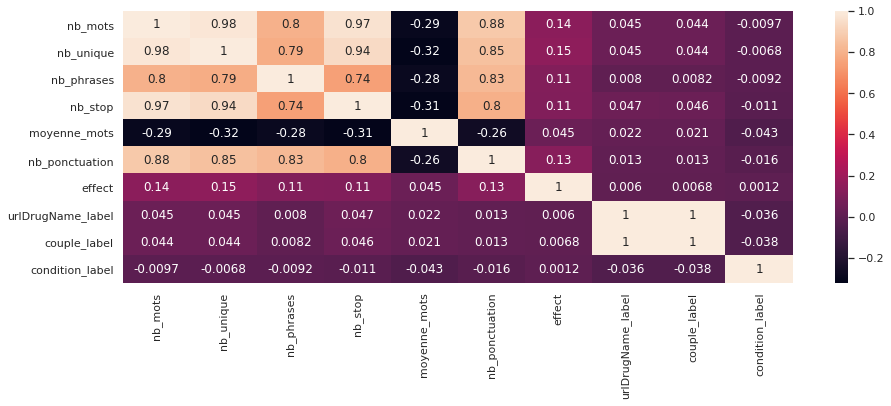

In [ ]:
fig,axe = plt.subplots(figsize=((15,5)))
sns.heatmap(X_train_eff.corr(),annot=True);

## Essayons un random Forest

In [ ]:
X = X_train_eff[["nb_mots","nb_unique","nb_phrases","nb_stop","moyenne_mots","nb_ponctuation","urlDrugName_label","condition_label"]]
X_test1 = X_test_eff[["nb_mots","nb_unique","nb_phrases","nb_stop","moyenne_mots","nb_ponctuation","urlDrugName_label","condition_label"]]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = RandomForestClassifier(random_state=3,max_depth=10);
model.fit(X,y_train_eff_label);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
cross_val_score(model,X,y_train_eff_label["effect"],cv=3,scoring="roc_auc")

array([0.60279964, 0.61384615, 0.61799865])

In [ ]:
pred = model.predict(X_test1)
pred1 = model.predict_proba(X_test1)
print(accuracy_score(y_test_eff_label,pred))
print(roc_auc_score(y_test_eff_label,pred1[:,1]))
confusion_matrix(y_test_eff_label,pred)

0.7191119691119691
0.6221869977764569


array([[ 28, 287],
       [  4, 717]])

## KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X,y_train_eff_label)
cross_val_score(model,X[["condition_label","urlDrugName_label"]],y_train_eff_label["effect"],cv=3,scoring="roc_auc")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.51005636, 0.55151127, 0.54463715])

In [ ]:
pred = model.predict(X_test1)
pred1 = model.predict(X_test1)
print(accuracy_score(y_test_eff_label,pred))
print(roc_auc_score(y_test_eff_label,pred1))
confusion_matrix(y_test_eff_label,pred)

0.553088803088803
0.5001541069502236


array([[115, 200],
       [263, 458]])

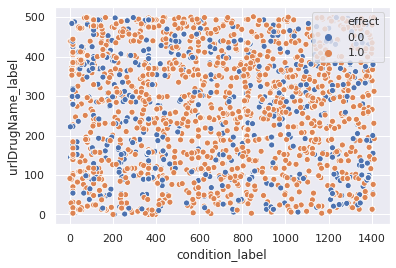

In [ ]:
sns.scatterplot(x="condition_label",y="urlDrugName_label",data=pd.concat([X,y_train_eff_label],axis=1),hue="effect");

## Lemmatizer

In [ ]:
from nltk.stem import WordNetLemmatizer
Lem = WordNetLemmatizer()
def custom_tokenizer_lem(document):
    return [Lem.lemmatize(w.lower(),pos='v') for w in nltk.word_tokenize(document)if w != '' if w not in stopwords if w!='.' if w !='!' if w != ','if w!= ')'if w != '('if w != '1'if w != '3'if w != '2'if w != "'s"if w != '...'if w != "''"if w != '-']
from collections import defaultdict
def generate_ngrams(text, n_gram=1):
    token = [token for token in custom_tokenizer_lem(text) if token != '' if token not in stopwords if token!='.' if token !='!' if token != ','if token != ')'if token != '()']
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]


In [ ]:
N = 15
n=3
HE_unigrams = defaultdict(int)
CE_unigrams = defaultdict(int)
ME_unigrams = defaultdict(int)
MaE_unigrams = defaultdict(int)
I_unigrams = defaultdict(int)

for c in X_train_eff[X_train_eff['effect']==1]['benefitsReview']:
    for word in generate_ngrams(c,n):
        HE_unigrams[word] += 1 
for c in X_train_eff[X_train_eff['effect']==0]['benefitsReview']:
    for word in generate_ngrams(c,n):
        CE_unigrams[word] += 1
for c in X_train_eff[X_train_eff['effect']==4]['benefitsReview']:
    for word in generate_ngrams(c,n):
        ME_unigrams[word] += 1
for c in X_train_eff[X_train_eff['effect']==3]['benefitsReview']:
    for word in generate_ngrams(c,n):
        MaE_unigrams[word] += 1
for c in X_train_eff[X_train_eff['effect']==2]['benefitsReview']:
    for word in generate_ngrams(c,n):
        I_unigrams[word] += 1

HE_unigrams = pd.DataFrame(sorted(HE_unigrams.items(), key=lambda x: x[1])[::-1])
CE_unigrams = pd.DataFrame(sorted(CE_unigrams.items(), key=lambda x: x[1])[::-1])
ME_unigrams = pd.DataFrame(sorted(ME_unigrams.items(), key=lambda x: x[1])[::-1])
MaE_unigrams = pd.DataFrame(sorted(MaE_unigrams.items(), key=lambda x: x[1])[::-1])
I_unigrams = pd.DataFrame(sorted(I_unigrams.items(), key=lambda x: x[1])[::-1])

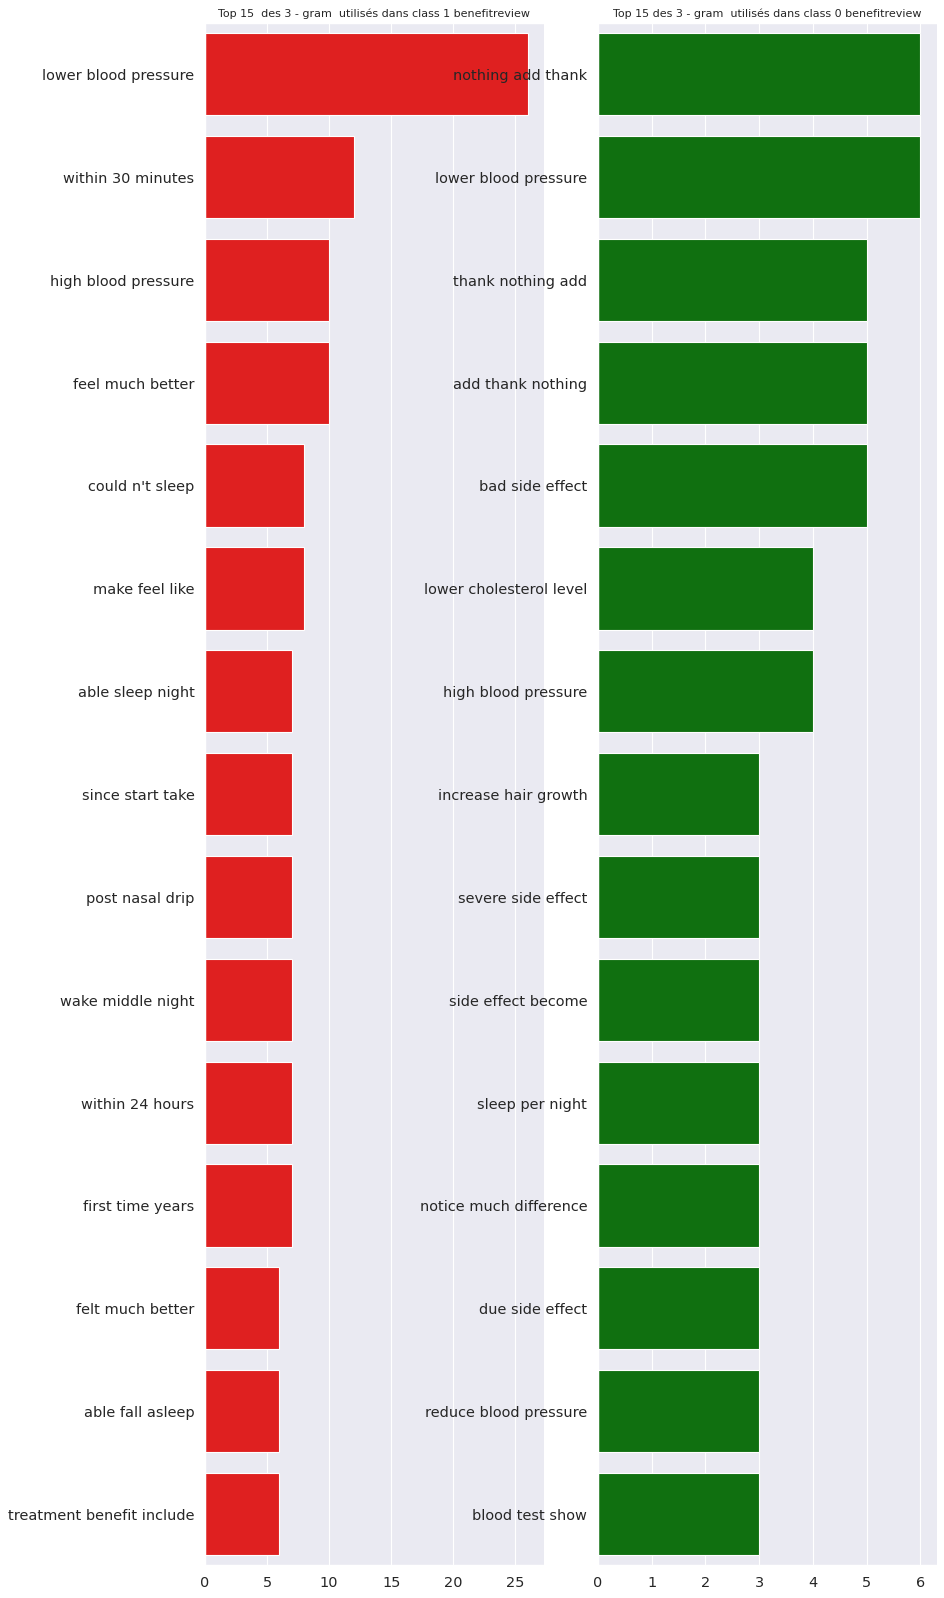

In [ ]:

fig, axes = plt.subplots(ncols=2, figsize=(10, 20), dpi=80)
plt.tight_layout()
sns.barplot(y=HE_unigrams[0].values[:N], x=HE_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=CE_unigrams[0].values[:N], x=CE_unigrams[1].values[:N], ax=axes[1], color='green')
#sns.barplot(y=ME_unigrams[0].values[:N], x=HE_unigrams[1].values[:N], ax=axes[2], color='yellow')
#sns.barplot(y=MaE_unigrams[0].values[:N], x=CE_unigrams[1].values[:N], ax=axes[3], color='black')
#sns.barplot(y=I_unigrams[0].values[:N], x=CE_unigrams[1].values[:N], ax=axes[4], color='gray')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N}  des {n} - gram  utilisés dans class 1 benefitreview', fontsize=10)
axes[1].set_title(f'Top {N} des {n} - gram  utilisés dans class 0 benefitreview', fontsize=10)
#axes[2].set_title(f'Top {N} ME', fontsize=10)
#axes[3].set_title(f'Top {N} MaE', fontsize=10)
#axes[4].set_title(f'Top {N} I', fontsize=10)


plt.show()

In [ ]:
N = 15
n=2
HE_unigrams = defaultdict(int)
CE_unigrams = defaultdict(int)
ME_unigrams = defaultdict(int)
MaE_unigrams = defaultdict(int)
I_unigrams = defaultdict(int)

for c in X_train_eff[X_train_eff['effect']==1]['commentsReview']:
    for word in generate_ngrams(c,n):
        HE_unigrams[word] += 1 
for c in X_train_eff[X_train_eff['effect']==0]['commentsReview']:
    for word in generate_ngrams(c,n):
        CE_unigrams[word] += 1
for c in X_train_eff[X_train_eff['effect']==4]['commentsReview']:
    for word in generate_ngrams(c,n):
        ME_unigrams[word] += 1
for c in X_train_eff[X_train_eff['effect']==3]['commentsReview']:
    for word in generate_ngrams(c,n):
        MaE_unigrams[word] += 1
for c in X_train_eff[X_train_eff['effect']==2]['commentsReview']:
    for word in generate_ngrams(c,n):
        I_unigrams[word] += 1

HE_unigrams = pd.DataFrame(sorted(HE_unigrams.items(), key=lambda x: x[1])[::-1])
CE_unigrams = pd.DataFrame(sorted(CE_unigrams.items(), key=lambda x: x[1])[::-1])
ME_unigrams = pd.DataFrame(sorted(ME_unigrams.items(), key=lambda x: x[1])[::-1])
MaE_unigrams = pd.DataFrame(sorted(MaE_unigrams.items(), key=lambda x: x[1])[::-1])
I_unigrams = pd.DataFrame(sorted(I_unigrams.items(), key=lambda x: x[1])[::-1])

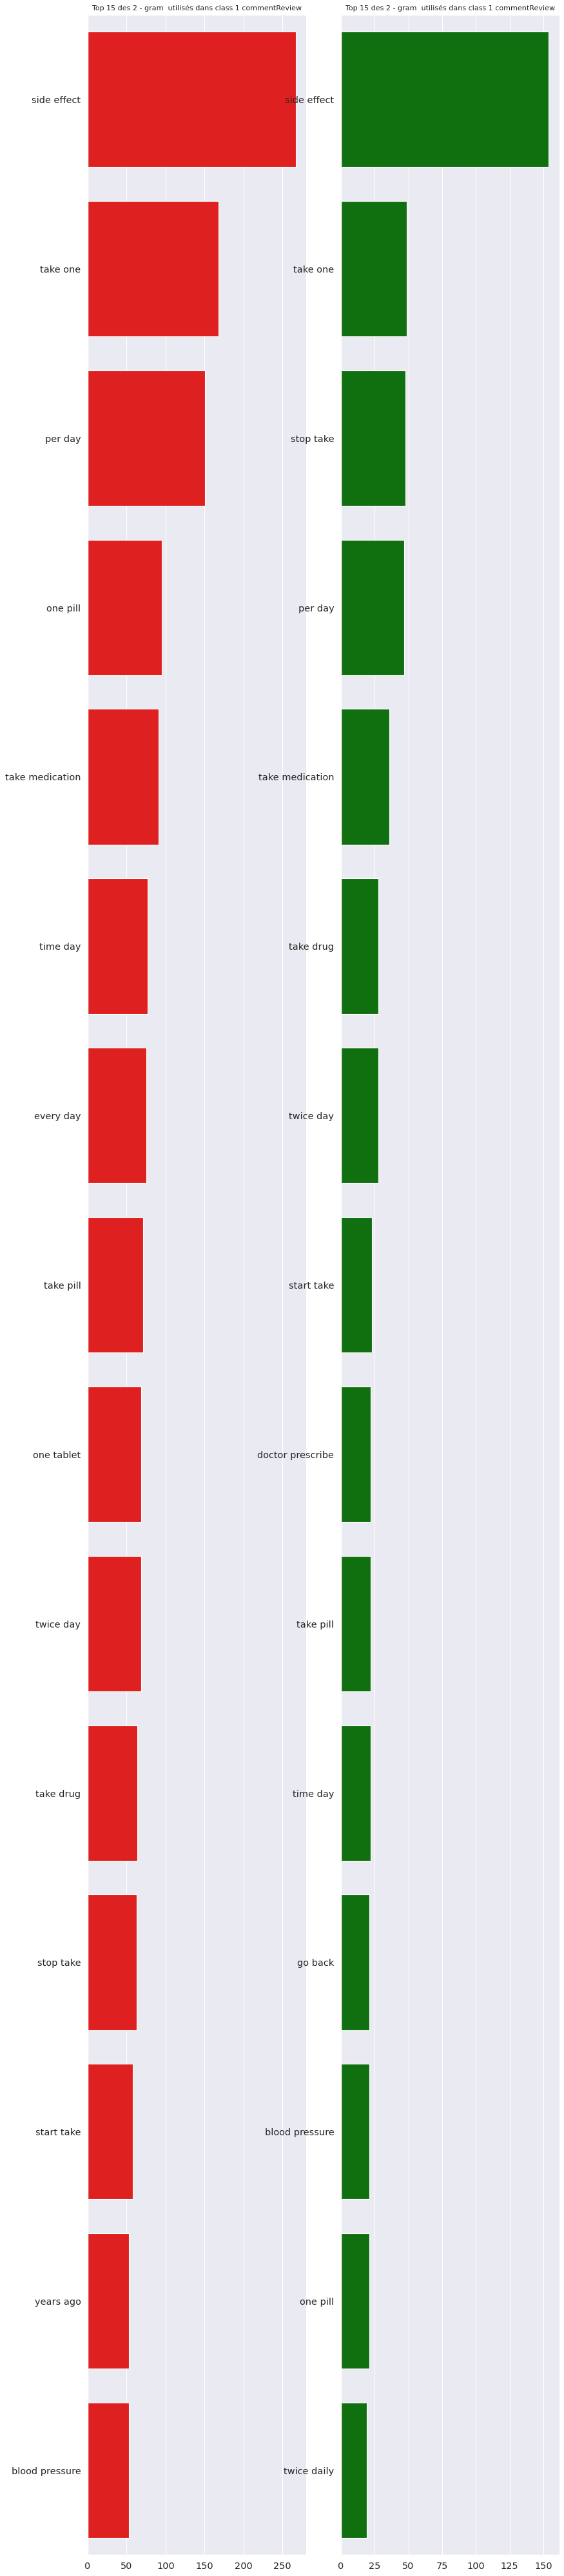

In [ ]:

fig, axes = plt.subplots(ncols=2, figsize=(10, 50), dpi=80)
plt.tight_layout()
sns.barplot(y=HE_unigrams[0].values[:N], x=HE_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=CE_unigrams[0].values[:N], x=CE_unigrams[1].values[:N], ax=axes[1], color='green')
#sns.barplot(y=ME_unigrams[0].values[:N], x=HE_unigrams[1].values[:N], ax=axes[2], color='yellow')
#sns.barplot(y=MaE_unigrams[0].values[:N], x=CE_unigrams[1].values[:N], ax=axes[3], color='black')
#sns.barplot(y=I_unigrams[0].values[:N], x=CE_unigrams[1].values[:N], ax=axes[4], color='gray')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} des {n} - gram  utilisés dans class 1 commentReview', fontsize=10)
axes[1].set_title(f'Top {N} des {n} - gram  utilisés dans class 1 commentReview', fontsize=10)
#axes[2].set_title(f'Top {N} ME', fontsize=10)
#axes[3].set_title(f'Top {N} MaE', fontsize=10)
#axes[4].set_title(f'Top {N} I', fontsize=10)


plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
max_features = 50000
lem_vect3 = CountVectorizer(tokenizer=custom_tokenizer_lem,ngram_range=[1,3],max_features=max_features)
lem_bags3 = lem_vect3.fit_transform(X_train_eff['benefitsReview'])

lem_vect3_test = CountVectorizer(ngram_range=[1,3],max_features=max_features)
lem_bags3_test = lem_vect3_test.fit_transform(X_test_eff['benefitsReview'])

lem_vect = CountVectorizer(ngram_range=[1,3],max_features=max_features)
lem_bags = lem_vect.fit_transform(X_train_eff['benefitsReview'])


lem_vect_test = CountVectorizer(ngram_range=[1,3],max_features=max_features)
lem_bags_test = lem_vect_test.fit_transform(X_test_eff['benefitsReview'])

In [ ]:
lem_vect3_1 = CountVectorizer(tokenizer=custom_tokenizer_lem,ngram_range=[1,3],max_features=50000)
lem_bags3_1 = lem_vect3.fit_transform(X_train_eff['commentsReview'])

lem_vect3_test_1 = CountVectorizer(ngram_range=[1,3],max_features=50000)
lem_bags3_test_1 = lem_vect3_test.fit_transform(X_test_eff['commentsReview'])

lem_vect_1 = CountVectorizer(ngram_range=[1,3],max_features=50000)
lem_bags_1 = lem_vect.fit_transform(X_train_eff['commentsReview'])


lem_vect_test_1 = CountVectorizer(ngram_range=[1,3],max_features=50000)
lem_bags_test_1 = lem_vect_test.fit_transform(X_test_eff['commentsReview'])

## LSTM

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [ ]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


In [ ]:
maxlen = 80
batch_size = 32

print('Train...')
#model.fit(lem_bags3, y_train_eff_label,
          #batch_size=batch_size,
          #epochs=15)


Train...


In [ ]:
#score, acc = model.evaluate(lem_bags_test,lem_y_test,
                            #batch_size=50)
#print('Test score:', score)p#rint('Test accuracy:', acc)

## autres modèles

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = cross_val_score(LogisticRegression(),lem_bags3,y_train_eff_label,scoring='roc_auc',cv=3)
print ('Performance Logistic Regression {} +/- {}'.format(cv.mean(),cv.std())) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Logistic Regression 0.766096866075532 +/- 0.005473020823415811


In [ ]:
lem_bags3

<3107x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 114333 stored elements in Compressed Sparse Row format>

In [ ]:
model = LogisticRegression()
model.fit(lem_bags3,y_train_eff_label)
pred = model.predict(lem_bags3_test)
pred1 = model.predict_proba(lem_bags3_test)
print(accuracy_score(y_test_eff_label,pred))
print(roc_auc_score(y_test_eff_label,pred1[:,1]))
confusion_matrix(y_test_eff_label,pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6573359073359073
0.5440151465116791


array([[ 16, 299],
       [ 56, 665]])

# Essayons à présent de prédire si un médicament admet beaucoup d'effets secondaires.

In [ ]:
y_train_eff = X_train["sideEffects"]
X_train_eff = X_train.drop(["Unnamed: 0","sideEffects","rating","effectiveness","benefitsReview"],axis=1)

In [ ]:
y_test_eff = X_test["sideEffects"]
X_test_eff = X_test.drop(["Unnamed: 0","sideEffects","rating","effectiveness","benefitsReview"],axis=1)

In [ ]:
y_train_eff.unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
y_train_eff_label = l.fit_transform(y_train_eff)
y_train_eff_label = pd.DataFrame(y_train_eff_label)
y_train_eff_label.columns =['effect']


l = LabelEncoder()
y_test_eff_label = l.fit_transform(y_test_eff)
y_test_eff_label = pd.DataFrame(y_test_eff_label)
y_test_eff_label.columns =['effect']

In [ ]:
print("Dans le jeu d'apprentissage:")
print("il y a {} médicament avec des E-S extrêmement sévères".format(y_train_eff_label[y_train_eff_label["effect"]==0].shape[0]))
print("il y a {} médicament avec des E-S sévères".format(y_train_eff_label[y_train_eff_label["effect"]==4].shape[0]))
print("il y a {} médicament avec des E-S  modérés".format(y_train_eff_label[y_train_eff_label["effect"]==2].shape[0]))
print("il y a {} médicament avec des E-S pas sévère".format(y_train_eff_label[y_train_eff_label["effect"]==1].shape[0]))
print("il y a {} médicament avec aucun E_S".format(y_train_eff_label[y_train_eff_label["effect"]==3].shape[0]))

Dans le jeu d'apprentissage:
il y a 175 médicament avec des E-S extrêmement sévères
il y a 369 médicament avec des E-S sévères
il y a 614 médicament avec des E-S  modérés
il y a 1019 médicament avec des E-S pas sévère
il y a 930 médicament avec aucun E_S


In [ ]:
print("Dans le jeu d'apprentissage:")
print("il y a {} médicament avec des E-S extrêmement sévères".format(y_test_eff_label[y_test_eff_label["effect"]==0].shape[0]))
print("il y a {} médicament avec des E-S sévères".format(y_test_eff_label[y_test_eff_label["effect"]==4].shape[0]))
print("il y a {} médicament avec des E-S  modérés".format(y_test_eff_label[y_test_eff_label["effect"]==2].shape[0]))
print("il y a {} médicament avec des E-S pas sévère".format(y_test_eff_label[y_test_eff_label["effect"]==1].shape[0]))
print("il y a {} médicament avec aucun E_S".format(y_test_eff_label[y_test_eff_label["effect"]==3].shape[0]))

Dans le jeu d'apprentissage:
il y a 80 médicament avec des E-S extrêmement sévères
il y a 122 médicament avec des E-S sévères
il y a 236 médicament avec des E-S  modérés
il y a 330 médicament avec des E-S pas sévère
il y a 268 médicament avec aucun E_S


Par souci de simplicité comme pour l'efficacité des médicaments, nous allons considérer que les médicaments qui ont des E-S extrêmements graves et grave uniquement seront tratés ensemble et les autres seront également regroupés ensemble. Nous nous ramenons donc un problème de classification binaire


In [ ]:
def multi_bi(data):
  n=data.shape[0]
  data_new = np.zeros(n)
  for i in range(n):
    if data["effect"][i] == 4 or data["effect"][i]==0:
        data_new[i]=1
    else :
        data_new[i]=0
  data_new = pd.DataFrame(data_new)
  data_new.columns=["effect"]
  return data_new

In [ ]:
y_train_eff_label = multi_bi(y_train_eff_label)
y_test_eff_label = multi_bi(y_test_eff_label)

In [ ]:
tokens = X_train_eff['sideEffectsReview'].apply(nltk.word_tokenize).values
stopwords = nltk.corpus.stopwords.words('english')

new_data = pd.DataFrame()

new_data['nb_mots'] = [len(w) for w in tokens]
new_data['nb_unique'] = [len(np.unique(w)) for w in tokens]
new_data['nb_phrases'] = X_train_eff['sideEffectsReview'].apply(lambda x: len(x.split('.')))
new_data['nb_stop'] = [sum(np.isin(tks,stopwords)) for tks in tokens]
new_data['moyenne_mots'] = [np.mean([len(x) for x in w]) for w in tokens]
new_data["nb_ponctuation"] = X_train_eff['sideEffectsReview'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
label_eff = pd.DataFrame(y_train_eff_label)
label_eff.columns = ["effect"]
data_eff = pd.concat([new_data,label_eff],axis=1)

In [ ]:
tokens = X_test_eff['sideEffectsReview'].apply(nltk.word_tokenize).values
stopwords = nltk.corpus.stopwords.words('english')

new_data_test_1 = pd.DataFrame()

new_data_test_1['nb_mots'] = [len(w) for w in tokens]
new_data_test_1['nb_unique'] = [len(np.unique(w)) for w in tokens]
new_data_test_1['nb_phrases'] = X_test_eff['sideEffectsReview'].apply(lambda x: len(x.split('.')))
new_data_test_1['nb_stop'] = [sum(np.isin(tks,stopwords)) for tks in tokens]
new_data_test_1['moyenne_mots'] = [np.mean([len(x) for x in w]) for w in tokens]
new_data_test_1["nb_ponctuation"] = X_test_eff['sideEffectsReview'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
label_eff = pd.DataFrame(y_test_eff_label)
label_eff.columns = ["effect"]
data_eff = pd.concat([new_data,label_eff],axis=1)

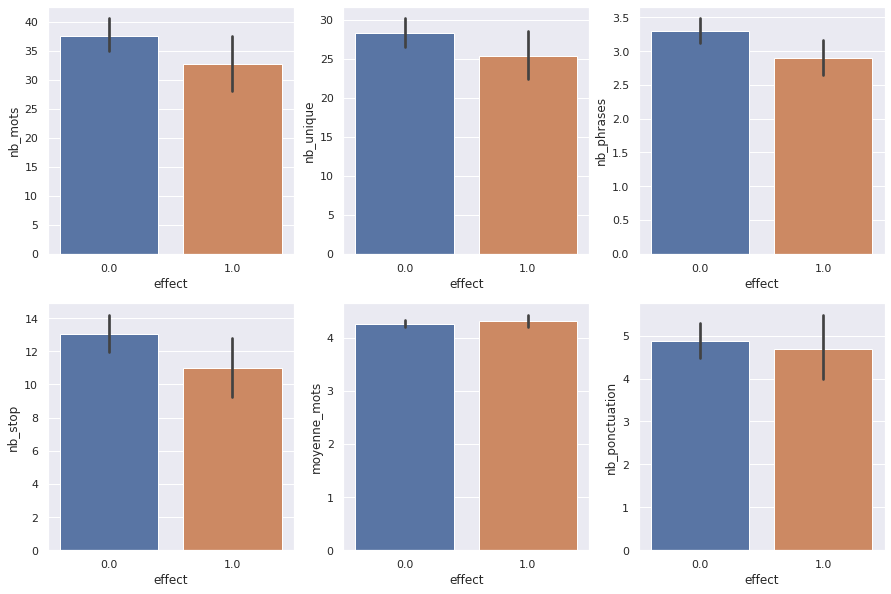

In [ ]:
fig,axe = plt.subplots(2,3,figsize=((15,10)))

sns.barplot(x="effect",y="nb_mots",data=data_eff,ax=axe[0,0]);
sns.barplot(x="effect",y="nb_unique",data=data_eff,ax=axe[0,1]);
sns.barplot(x="effect",y="nb_phrases",data=data_eff,ax=axe[0,2]);
sns.barplot(x="effect",y="nb_stop",data=data_eff,ax=axe[1,0]);
sns.barplot(x="effect",y="moyenne_mots",data=data_eff,ax=axe[1,1]);
sns.barplot(x="effect",y="nb_ponctuation",data=data_eff,ax=axe[1,2]);

### LabelEncoder

In [ ]:
X_train_eff = pd.concat([X_train_eff,new_data,pd.DataFrame(y_train_eff_label)],axis=1)
X_test_eff = pd.concat([X_test_eff,new_data_test_1,pd.DataFrame(y_test_eff_label)],axis=1)

In [ ]:
X_train_eff.sort_values("urlDrugName")[:5]

,urlDrugName,condition,sideEffectsReview,commentsReview,nb_mots,nb_unique,nb_phrases,nb_stop,moyenne_mots,nb_ponctuation,effect
2270,abilify,bipolar,"I became drowsy, however, with adequate sleep ...",the abilify decreased the need for daily klono...,45,39,2,14,4.044444,8,0.0
1754,abilify,depression/anxiety,no side effects have been noticed,I take one pill of each 1st thing in the am......,6,6,1,3,4.666667,0,0.0
237,abilify,depression,None so far.,My doctor added Abilify to my 60 mg of Cymbalt...,4,4,2,1,2.500000,1,0.0
189,abilify,depression not resolved with antidepressant drugs,but it caused memory loss and again an inciden...,I am only taking ativan & getting psychologica...,149,108,9,59,4.147651,17,1.0
1068,abilify,bipolar disorder,A very uncomfortable inner restlessness was th...,I was prescribed Abilify (15mg/daily) to assis...,49,41,4,12,3.979592,8,1.0


In [ ]:
drug_cond = X_train_eff['urlDrugName'].astype('object')+str(' ')+X_train_eff['condition'].astype('object')
drug_cond = pd.DataFrame(drug_cond)
drug_cond.columns = ["couple"]

drug_cond_t = X_test_eff['urlDrugName'].astype('object')+str(' ')+X_test_eff['condition'].astype('object')
drug_cond_t = pd.DataFrame(drug_cond_t)
drug_cond_t.columns = ["couple"]
Encoder = LabelEncoder()
urlDrugName_label = pd.DataFrame(Encoder.fit_transform(X_train_eff["urlDrugName"]))
urlDrugName_label.columns = ["urlDrugName_label"]

Encoder = LabelEncoder()
urlDrugName_label_t = pd.DataFrame(Encoder.fit_transform(X_test_eff["urlDrugName"]))
urlDrugName_label_t.columns = ["urlDrugName_label"]
condition =X_train_eff['condition'].apply(lambda x: str(x).replace(" ",""))
drug_cond =drug_cond['couple'].apply(lambda x: str(x).replace(" ",""))
condition_label = pd.DataFrame(Encoder.fit_transform(condition))
condition_label.columns = ["condition_label"]
couple_label = pd.DataFrame(Encoder.fit_transform(drug_cond))
couple_label.columns = ["couple_label"]

condition_t =X_test_eff['condition'].apply(lambda x: str(x).replace(" ",""))
drug_cond_t =drug_cond_t['couple'].apply(lambda x: str(x).replace(" ",""))
condition_label_t = pd.DataFrame(Encoder.fit_transform(condition_t))
condition_label_t.columns = ["condition_label"]
couple_label_t = pd.DataFrame(Encoder.fit_transform(drug_cond_t))
couple_label_t.columns = ["couple_label"]
X_train_eff  = pd.concat([X_train_eff,urlDrugName_label,couple_label,condition_label],axis=1)
X_test_eff  = pd.concat([X_test_eff,urlDrugName_label_t,couple_label_t,condition_label_t],axis=1)
X_train_eff.sort_values("urlDrugName").head(5)

,urlDrugName,condition,sideEffectsReview,commentsReview,nb_mots,nb_unique,nb_phrases,nb_stop,moyenne_mots,nb_ponctuation,effect,urlDrugName_label,couple_label,condition_label
2270,abilify,bipolar,"I became drowsy, however, with adequate sleep ...",the abilify decreased the need for daily klono...,45,39,2,14,4.044444,8,0.0,0,0,200
1754,abilify,depression/anxiety,no side effects have been noticed,I take one pill of each 1st thing in the am......,6,6,1,3,4.666667,0,0.0,0,3,382
237,abilify,depression,None so far.,My doctor added Abilify to my 60 mg of Cymbalt...,4,4,2,1,2.500000,1,0.0,0,2,365
189,abilify,depression not resolved with antidepressant drugs,but it caused memory loss and again an inciden...,I am only taking ativan & getting psychologica...,149,108,9,59,4.147651,17,1.0,0,4,397
1068,abilify,bipolar disorder,A very uncomfortable inner restlessness was th...,I was prescribed Abilify (15mg/daily) to assis...,49,41,4,12,3.979592,8,1.0,0,1,206


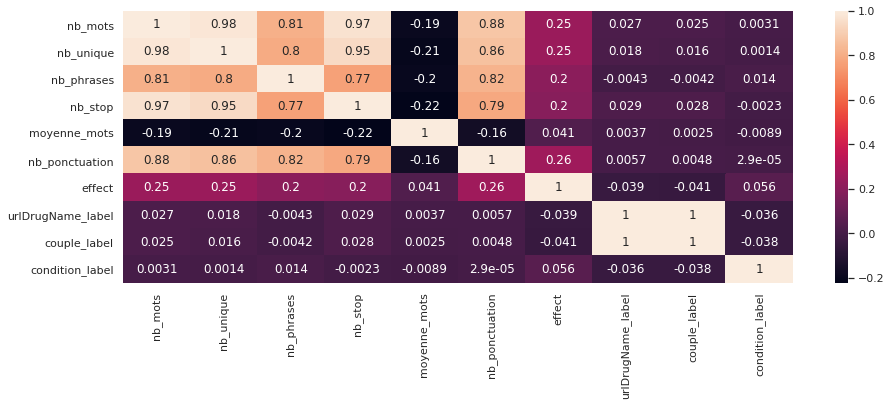

In [ ]:
fig,axe = plt.subplots(figsize=((15,5)))
sns.heatmap(X_train_eff.corr(),annot=True);

### Comme pour la première partie, commençons par un RandomForest.

In [ ]:
X = X_train_eff[["nb_mots","nb_unique","nb_phrases","nb_stop","moyenne_mots","nb_ponctuation","urlDrugName_label","condition_label"]]
X_test1 = X_test_eff[["nb_mots","nb_unique","nb_phrases","nb_stop","moyenne_mots","nb_ponctuation","urlDrugName_label","condition_label"]]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = RandomForestClassifier(random_state=3,max_depth=10);
model.fit(X,y_train_eff_label);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
cross_val_score(model,X,y_train_eff_label["effect"],cv=3,scoring="roc_auc")

array([0.7477109 , 0.77455156, 0.73381034])

In [ ]:
pred = model.predict(X_test1)
pred1 = model.predict_proba(X_test1)
print(accuracy_score(y_test_eff_label,pred))
print(roc_auc_score(y_test_eff_label,pred1[:,1]))
confusion_matrix(y_test_eff_label,pred)

0.8146718146718147
0.7565234940760264


array([[810,  24],
       [168,  34]])

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X,y_train_eff_label)
cross_val_score(model,X[["condition_label","urlDrugName_label"]],y_train_eff_label["effect"],cv=3,scoring="roc_auc")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.50235857, 0.57098464, 0.54066337])

In [ ]:
pred = model.predict(X_test1)
pred1 = model.predict(X_test1)
print(accuracy_score(y_test_eff_label,pred))
print(roc_auc_score(y_test_eff_label,pred1))
confusion_matrix(y_test_eff_label,pred)

0.7905405405405406
0.5247702827836741


array([[801,  33],
       [184,  18]])

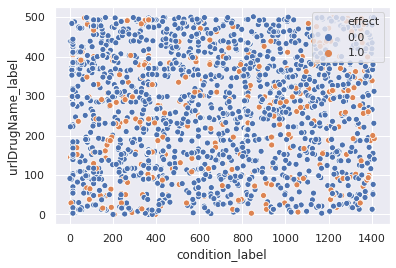

In [ ]:
sns.scatterplot(x="condition_label",y="urlDrugName_label",data=pd.concat([X,y_train_eff_label],axis=1),hue="effect");

### Lemmatizer

In [ ]:
from nltk.stem import WordNetLemmatizer
Lem = WordNetLemmatizer()
def custom_tokenizer_lem(document):
    return [Lem.lemmatize(w.lower(),pos='v') for w in nltk.word_tokenize(document)if w != '' if w not in stopwords if w!='.' if w !='!' if w != ','if w!= ')'if w != '('if w != '1'if w != '3'if w != '2'if w != "'s"if w != '...'if w != "''"if w != '-']
from collections import defaultdict
def generate_ngrams(text, n_gram=1):
    token = [token for token in custom_tokenizer_lem(text) if token != '' if token not in stopwords if token!='.' if token !='!' if token != ','if token != ')'if token != '()']
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]


In [ ]:
N = 15
n=3
HE_unigrams = defaultdict(int)
CE_unigrams = defaultdict(int)
ME_unigrams = defaultdict(int)
MaE_unigrams = defaultdict(int)
I_unigrams = defaultdict(int)

for c in X_train_eff[X_train_eff['effect']==1]['sideEffectsReview']:
    for word in generate_ngrams(c,n):
        HE_unigrams[word] += 1 
for c in X_train_eff[X_train_eff['effect']==0]['sideEffectsReview']:
    for word in generate_ngrams(c,n):
        CE_unigrams[word] += 1
for c in X_train_eff[X_train_eff['effect']==4]['sideEffectsReview']:
    for word in generate_ngrams(c,n):
        ME_unigrams[word] += 1
for c in X_train_eff[X_train_eff['effect']==3]['sideEffectsReview']:
    for word in generate_ngrams(c,n):
        MaE_unigrams[word] += 1
for c in X_train_eff[X_train_eff['effect']==2]['sideEffectsReview']:
    for word in generate_ngrams(c,n):
        I_unigrams[word] += 1

HE_unigrams = pd.DataFrame(sorted(HE_unigrams.items(), key=lambda x: x[1])[::-1])
CE_unigrams = pd.DataFrame(sorted(CE_unigrams.items(), key=lambda x: x[1])[::-1])
ME_unigrams = pd.DataFrame(sorted(ME_unigrams.items(), key=lambda x: x[1])[::-1])
MaE_unigrams = pd.DataFrame(sorted(MaE_unigrams.items(), key=lambda x: x[1])[::-1])
I_unigrams = pd.DataFrame(sorted(I_unigrams.items(), key=lambda x: x[1])[::-1])

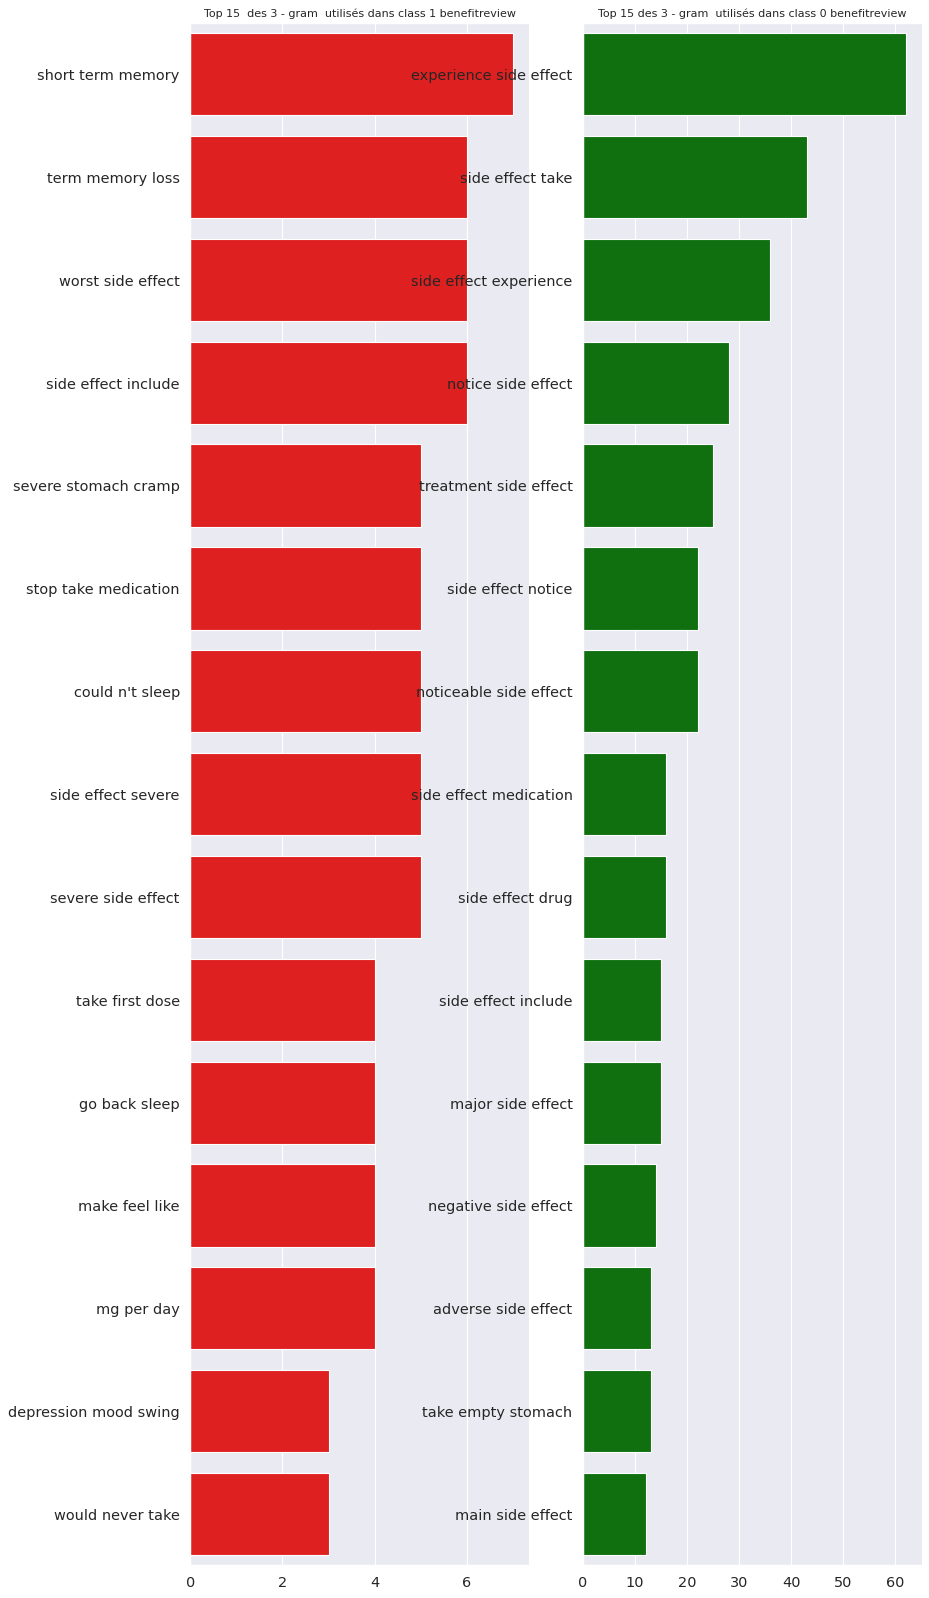

In [ ]:

fig, axes = plt.subplots(ncols=2, figsize=(10, 20), dpi=80)
plt.tight_layout()
sns.barplot(y=HE_unigrams[0].values[:N], x=HE_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=CE_unigrams[0].values[:N], x=CE_unigrams[1].values[:N], ax=axes[1], color='green')
#sns.barplot(y=ME_unigrams[0].values[:N], x=HE_unigrams[1].values[:N], ax=axes[2], color='yellow')
#sns.barplot(y=MaE_unigrams[0].values[:N], x=CE_unigrams[1].values[:N], ax=axes[3], color='black')
#sns.barplot(y=I_unigrams[0].values[:N], x=CE_unigrams[1].values[:N], ax=axes[4], color='gray')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N}  des {n} - gram  utilisés dans class 1 benefitreview', fontsize=10)
axes[1].set_title(f'Top {N} des {n} - gram  utilisés dans class 0 benefitreview', fontsize=10)
#axes[2].set_title(f'Top {N} ME', fontsize=10)
#axes[3].set_title(f'Top {N} MaE', fontsize=10)
#axes[4].set_title(f'Top {N} I', fontsize=10)


plt.show()

### Autres modèles

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
max_features = 50000
lem_vect3 = CountVectorizer(tokenizer=custom_tokenizer_lem,ngram_range=[1,3],max_features=max_features)
lem_bags3 = lem_vect3.fit_transform(X_train_eff['sideEffectsReview'])

lem_vect3_test = CountVectorizer(ngram_range=[1,3],max_features=max_features)
lem_bags3_test = lem_vect3_test.fit_transform(X_test_eff['sideEffectsReview'])

lem_vect = CountVectorizer(ngram_range=[1,3],max_features=max_features)
lem_bags = lem_vect.fit_transform(X_train_eff['sideEffectsReview'])


lem_vect_test = CountVectorizer(ngram_range=[1,3],max_features=max_features)
lem_bags_test = lem_vect_test.fit_transform(X_test_eff['sideEffectsReview'])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = cross_val_score(LogisticRegression(),lem_bags3,y_train_eff_label,scoring='roc_auc',cv=3)
print ('Performance Logistic Regression {} +/- {}'.format(cv.mean(),cv.std())) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Logistic Regression 0.8415466582637919 +/- 0.004227599209523598


In [ ]:
model = LogisticRegression()
model.fit(lem_bags3,y_train_eff_label)
pred = model.predict(lem_bags3_test)
pred1 = model.predict_proba(lem_bags3_test)
print(accuracy_score(y_test_eff_label,pred))
print(roc_auc_score(y_test_eff_label,pred1[:,1]))
confusion_matrix(y_test_eff_label,pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7972972972972973
0.5429755205736401


array([[812,  22],
       [188,  14]])